In [24]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

EXERCISE 1. What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. 

Give a 99% confidence interval for the average body temperature of healthy people.

In [49]:
x_bar = 98.25
s = 0.73    
n = 130             
confidence_level = 0.99

In [57]:
sem = s / np.sqrt(n)

In [58]:
sem

0.06402523540941313

In [62]:
ci_z = stats.norm.interval(0.99, x_bar, sem)
ci_z

(98.08508192246582, 98.41491807753418)

In [61]:
stats.t.interval(0.95,             
                 df=n -1,    
                 loc= x_bar,     
                 scale = sem)

(98.12332450367107, 98.37667549632893)

In [53]:

df = n - 1


t_score = stats.t.ppf((1 + confidence_level) / 2, df)


sem = s / np.sqrt(n)


margin_of_error = t_score * sem
lower_bound = x_bar - margin_of_error
upper_bound = x_bar + margin_of_error


print("Confidence Intervals:")
print("Lower limit:", lower_bound)
print("Upper limit:", upper_bound)



Confidence Intervals:
Lower limit: 98.08260738705933
Upper limit: 98.41739261294067


EXERCISE 2. The administrators for a hospital wished to estimate the average number of days required for inpatient treatment of patients between the ages of 25 and 34. A random sample of 500 hospital patients between these ages produced a mean and standard deviation equal to 5.4 and 3.1 days, respectively.


Construct a 95% confidence interval for the mean length of stay for the population of patients from which the sample was drawn.

In [29]:
x_bar = 3.1
n = 500
alpha = 0.95

In [32]:
sem = x_bar / np.sqrt(n)

In [33]:
sem

0.13863621460498696

In [34]:
stats.norm.interval(0.95, 5.4, sem)

(5.12827801242126, 5.67172198757874)

In [44]:
sample_mean = 5.4  
sample_std = 3.1    
n = 500             
confidence_level = 0.95 


df = n - 1


t_score = stats.t.ppf((1 + confidence_level) / 2, df)


sem = sample_std / np.sqrt(n)


margin_of_error = t_score * sem
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error


print("Confidence Intervals:")
print("Lower limit:", lower_bound)
print("Upper limit:", upper_bound)

Confidence Intervals:
Lower limit: 5.127617354510309
Upper limit: 5.672382645489692


EXERCISE 3. The hourly wages in a particular industry are normally distributed with mean $13.20 and standard deviation $2.50. A company in this industry employs 40 workers, paying them an average of $12.20 per hour. Can this company be accused of paying substandard wages? Use an α = .01 level test. (Wackerly, Ex.10.18)

CHECK: statistic: -2.5298221281347035, pvalue= 0.005706018193000826



In [2]:
mu = 13.20
sigma = 2.50
n = 40
x_bar = 12.20
#Ho : mu = 12.20
# H1 : mu > 12.20        

In [7]:
t =(x_bar -  mu) / (sigma /np.sqrt(n))
t

-2.5298221281347035

In [8]:
p_value =stats.t.cdf(t, n-1)
p_value

0.0077816812266594355

In [9]:
alpha = 0.01

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


EXERCISE 4.Shear strength measurements derived from unconfined compression tests for two types of soils gave the results shown in the following document (measurements in tons per square foot). Do the soils appear to differ with respect to average shear strength, at the 1% significance level?

Results for two type of soils

CHECK: statistic: 5.1681473319343345, pvalue= 2.593228732352821e-06

In [81]:
soil = pd.read_excel('soil.xlsx')

In [74]:
soil.head()

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371


In [83]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Soil1   30 non-null     float64
 1   Soil2   35 non-null     float64
dtypes: float64(2)
memory usage: 692.0 bytes


In [82]:
soil.describe()

,Soil1,Soil2
count,30.000000,35.000000
mean,1.691800,1.417114
std,0.206903,0.219184
min,1.110000,1.053000
25%,1.572000,1.231000
50%,1.675000,1.379000
75%,1.865250,1.559000
max,2.054000,1.878000


In [84]:
soil

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [ ]:
# H0 = The average shear strength of the two types of soils is the same.
# H1 = The average shear strength of the two types of soils is different.

In [86]:
soil1 = soil['Soil1'].dropna()
soil2 = soil['Soil2']
t_stat, p_value = stats.ttest_ind(soil1, soil2)

# Output the results
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: 5.1681473319343345
p-value: 2.593228732352821e-06


In [87]:
alpha = 0.01

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.01 level of significance, we can reject the null hypothesis in favor of alternative hypothesis.


EXERCISE 5. The following dataset is based on data provided by the World Bank (https://datacatalog.worldbank.org/dataset/education-statistics). World Bank Edstats.  2015 PISA Test Dataset

Get descriptive statistics (the central tendency, dispersion and shape of a dataset’s distribution) for each continent group (AS, EU, AF, NA, SA, OC).
Determine whether there is any difference (on the average) for the math scores among European (EU) and Asian (AS) countries (assume normality and equal variances). Draw side-by-side box plots.
CHECK: statistic=0.870055317967983, pvalue=0.38826888111307345

In [116]:
df0 = pd.read_excel('2015 PISA Test.xlsx')

In [117]:
df = df0.copy()

In [91]:
df.head()

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375


In [98]:
df.groupby('Continent_Code')['Math'].describe()

,count,mean,std,min,25%,50%,75%,max
Continent_Code,,,,,,,,
AF,2.0,363.212100,5.099513,359.6062,361.409150,363.21210,365.015050,366.8180
AS,17.0,466.216647,64.356490,380.2590,403.833200,459.81600,531.296100,564.1897
EU,37.0,477.981449,35.150403,371.3114,464.040100,489.72870,503.722000,521.2506
OC,2.0,494.559750,0.938401,493.8962,494.227975,494.55975,494.891525,495.2233
SA,7.0,402.887700,18.128894,377.0695,388.102200,409.03330,417.617650,422.6714


In [102]:
df_AS = df[df['Continent_Code'] == "AS"]['Math']


In [103]:
df_AS.info()

<class 'pandas.core.series.Series'>
Index: 17 entries, 1 to 69
Series name: Math
Non-Null Count  Dtype  
--------------  -----  
17 non-null     float64
dtypes: float64(1)
memory usage: 272.0 bytes


In [105]:
df_EU = df[df['Continent_Code'] == "EU"]['Math']

In [106]:
df_EU.info()

<class 'pandas.core.series.Series'>
Index: 37 entries, 0 to 66
Series name: Math
Non-Null Count  Dtype  
--------------  -----  
37 non-null     float64
dtypes: float64(1)
memory usage: 592.0 bytes



Hypothesis Test Results:
t-statistic: 0.8700553179679789
p-value: 0.38826888111307556


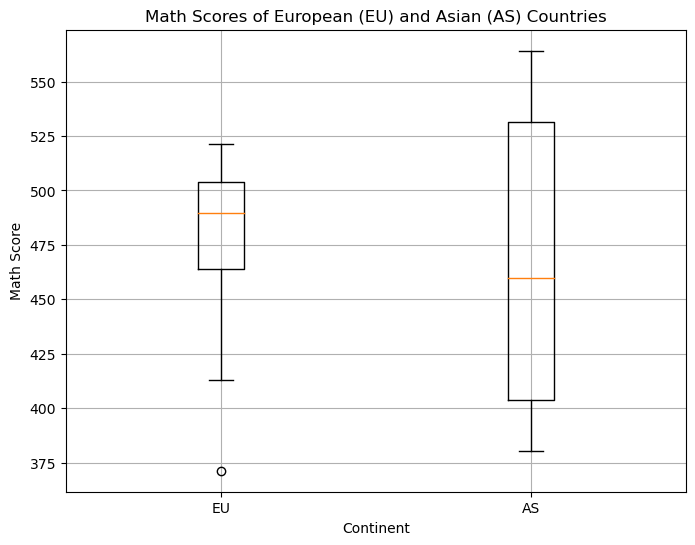

In [107]:
t_statistic, p_value = stats.ttest_ind(df_EU, df_AS, equal_var=True)

# Print the test results
print("\nHypothesis Test Results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Draw side-by-side box plots
plt.figure(figsize=(8, 6))
plt.boxplot([df_EU, df_AS], labels=["EU", "AS"])
plt.title("Math Scores of European (EU) and Asian (AS) Countries")
plt.xlabel("Continent")
plt.ylabel("Math Score")
plt.grid(True)
plt.show()

In [ ]:
# H0: There is no significant difference (on average) between European (EU) and Asian (AS) countries for mathematics scores.
# H1 : There is significant difference (on average) between European (EU) and Asian (AS) countries for mathematics scores.

In [119]:
alpha = 0.05

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we fail to reject the null hypothesis.
